<a href="https://colab.research.google.com/github/naidu1997/Machine-Learning/blob/main/Hierarchial_clustering_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#load dataset
data= pd.read_csv('/content/archive (22).zip')

In [16]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [18]:
data.isna().any()

,0
CustomerID,False
Gender,False
Age,False
Annual Income (k$),False
Spending Score (1-100),False


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [33]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [34]:
data.shape

(200, 5)

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

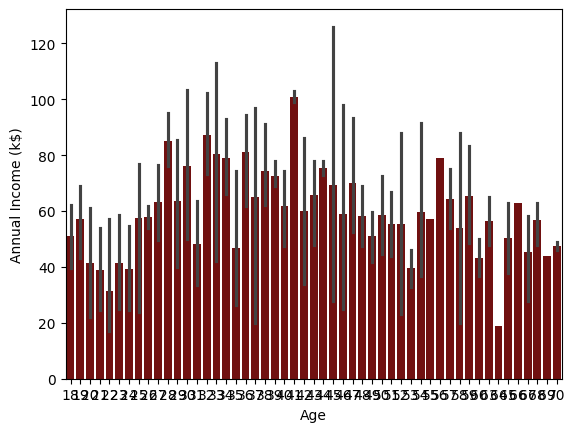

In [36]:
#visualization
sns.barplot(x='Age',y='Annual Income (k$)',data=data,color='maroon')

In [21]:
#here we extracted only 3 and 4 columns as we use 2D plot to see the clusters
x= data.iloc[:,[3,4]].values

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

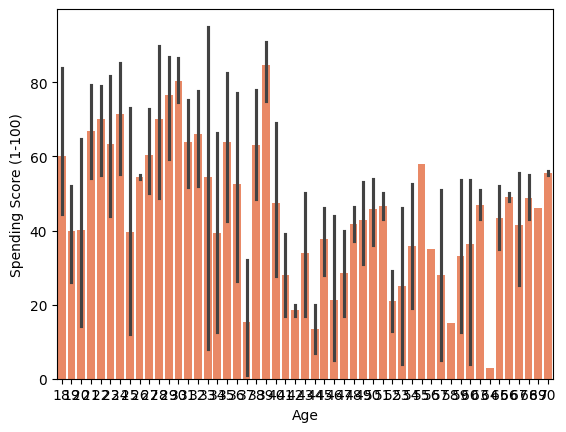

In [41]:
sns.barplot(x='Age',y='Spending Score (1-100)',data=data,color='coral')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

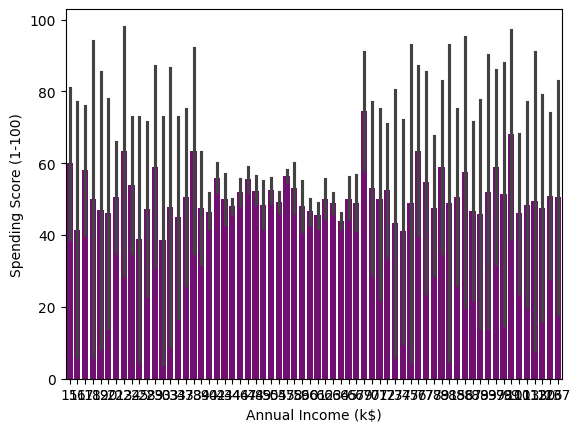

In [42]:
sns.barplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=data,color='purple')

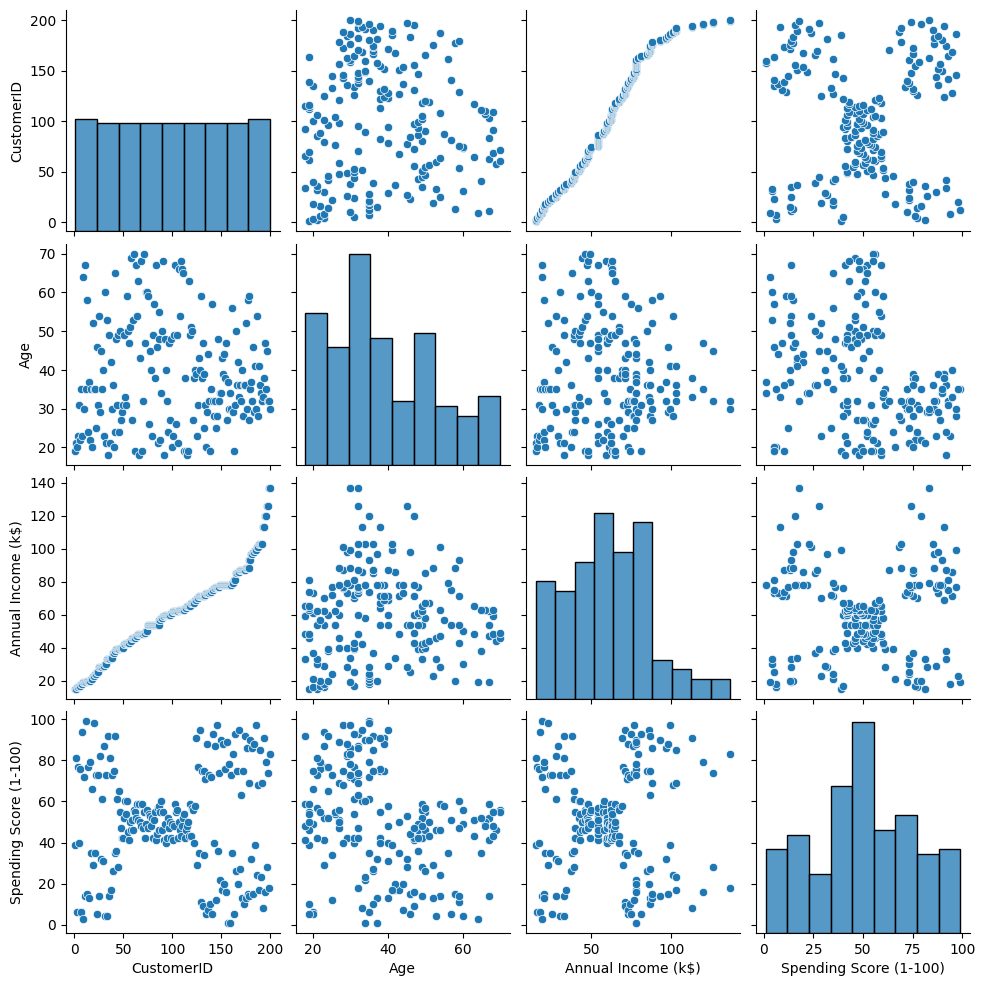

In [38]:
sns.pairplot(data)

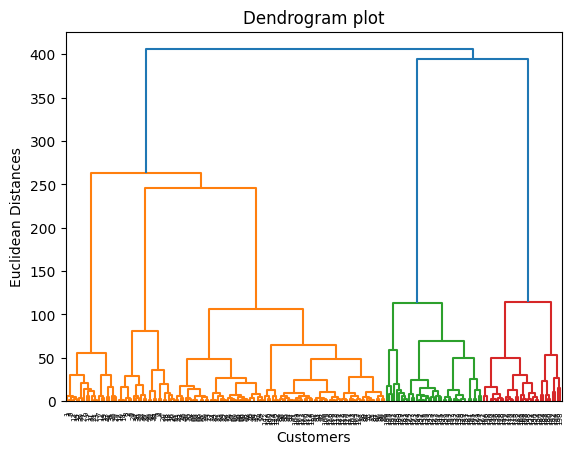

In [24]:
#finding the optimal number of clusters using the dendrogram
import scipy.cluster.hierarchy as shc
dendrogram= shc.dendrogram(shc.linkage(x,method='ward'))
plt.title("Dendrogram plot")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

In [27]:
#training the hierarchial model on dataset
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_pred= hc.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [29]:
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

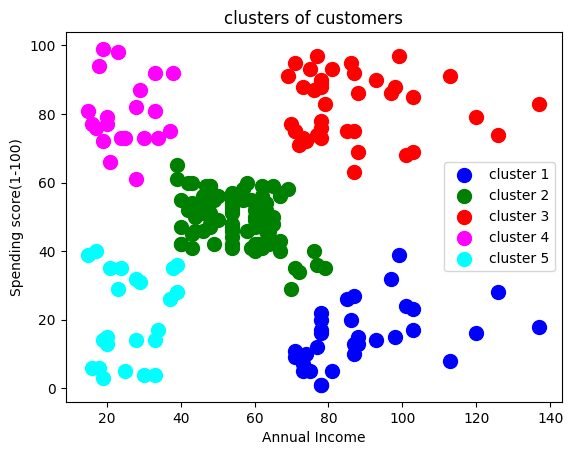

In [32]:
#visualizing the clusters
plt.scatter(x[y_pred== 0,0],x[y_pred== 0,1],s=100,color="blue",label="cluster 1")
plt.scatter(x[y_pred== 1,0],x[y_pred== 1,1],s= 100,color="green",label="cluster 2")
plt.scatter(x[y_pred== 2,0],x[y_pred== 2,1],s= 100,color="red",label="cluster 3")
plt.scatter(x[y_pred== 3,0],x[y_pred== 3,1],s= 100,color="magenta",label="cluster 4")
plt.scatter(x[y_pred== 4,0],x[y_pred== 4,1],s= 100,color="cyan",label="cluster 5")
plt.title("clusters of customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending score(1-100)")
plt.legend()
plt.show()
